# loan data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("loan_data.csv")
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
x=dataset.drop(["not.fully.paid","purpose"],axis=1)
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [4]:
y=dataset["not.fully.paid"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

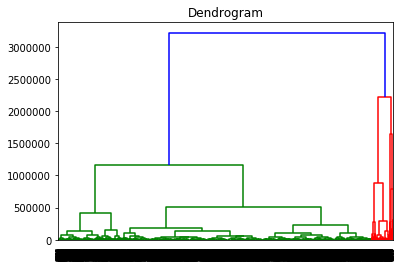

In [5]:
#using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title("Dendrogram")
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_hc=hc.fit_predict(x)

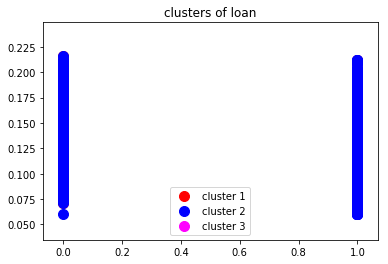

In [11]:
plt.scatter(x[y_hc==0].iloc[:,0],x[y_hc==0].iloc[:,1],s=100,c="red",label="cluster 1")
plt.scatter(x[y_hc==1].iloc[:,0],x[y_hc==1].iloc[:,1],s=100,c="blue",label="cluster 2")
plt.scatter(x[y_hc==2].iloc[:,0],x[y_hc==2].iloc[:,1],s=100,c="magenta",label="cluster 3")
plt.title("clusters of loan")
plt.legend()
plt.show()